In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv("..\project1\Fraudulent_E-Commerce_Transaction_Data_2.csv")
df2 = pd.read_csv("..\project1\Fraudulent_E-Commerce_Transaction_Data.csv")



In [99]:
merged_df= pd.concat([df,df2], ignore_index= True)
merged_df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


Is Fraudulent
0    1421526
1      75060
Name: Transaction Amount, dtype: int64


<Axes: ylabel='Transaction Amount'>

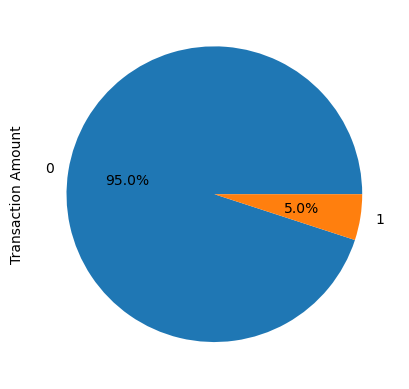

In [100]:
x_axis = merged_df.groupby(["Is Fraudulent"])["Transaction Amount"].count()
print(x_axis)
#x_axis.plot.bar()
x_axis.plot.pie(autopct= "%1.1f%%")



In [101]:
pay_by_cat = merged_df["Product Category"].groupby(merged_df["Payment Method"]).unique()
pay_by_cat
#df["Product Category"].unique()

Payment Method
PayPal           [electronics, toys & games, health & beauty, c...
bank transfer    [toys & games, electronics, home & garden, clo...
credit card      [electronics, clothing, home & garden, toys & ...
debit card       [toys & games, electronics, home & garden, clo...
Name: Product Category, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

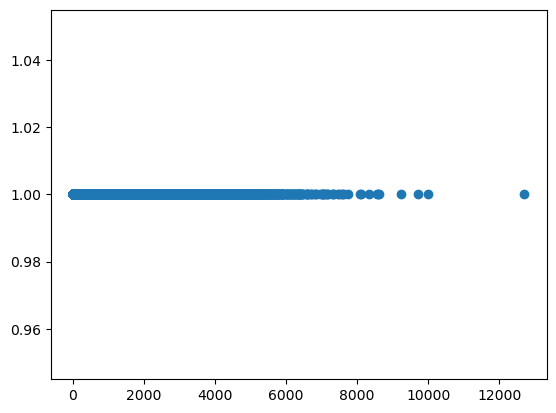

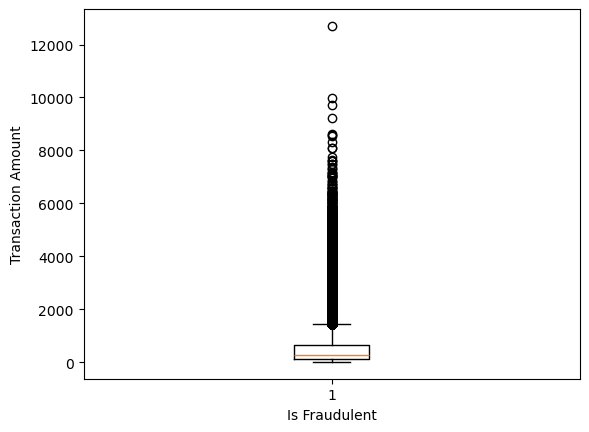

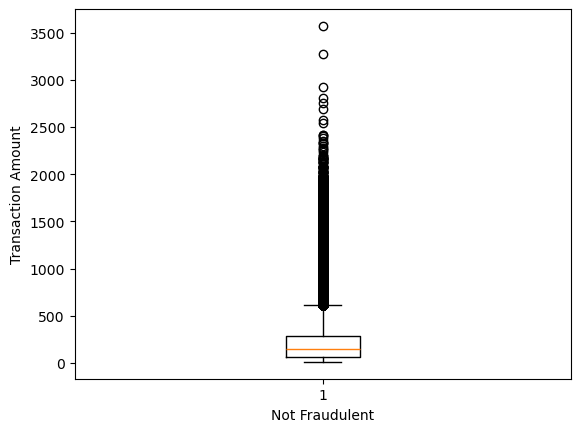

In [103]:
#subsetting data 
fraud_trans_amount = merged_df.loc[merged_df["Is Fraudulent"]==1]
not_fraud= merged_df.loc[merged_df["Is Fraudulent"]==0]

#scatter plot
plt.scatter(fraud_trans_amount["Transaction Amount"],fraud_trans_amount["Is Fraudulent"])

##boxplot
#fraudulent data
fig1, ax1 = plt.subplots()
label= merged_df["Is Fraudulent"]
ax1.set_xlabel("Is Fraudulent")
ax1.set_ylabel("Transaction Amount")
ax1.boxplot(fraud_trans_amount["Transaction Amount"])

#non-fraudulent data
fig1, ax1 = plt.subplots()
label= merged_df["Is Fraudulent"]
ax1.set_xlabel("Not Fraudulent")
ax1.set_ylabel("Transaction Amount")
ax1.boxplot(not_fraud["Transaction Amount"])

plt.show

In [104]:
#How is Transaction Amount influenced by the transaction being Fruadulent

summ_age= merged_df.groupby(["Is Fraudulent"])["Customer Age"].agg(['mean', 'median', 'var', 'std'] )
summ_age


,mean,median,var,std
Is Fraudulent,,,,
0,34.515217,35.0,100.055719,10.002786
1,34.467852,34.0,100.233355,10.011661


In [105]:
#How is Transaction Amount influenced by the transaction being Fruadulent

##Summary Statistics
summary_trans_amount = merged_df.groupby(["Is Fraudulent"])["Transaction Amount"].agg(['mean', 'median', 'var', 'std'] )
summary_trans_amount

#summ_age= df.groupby(["Is Fraudulent"])["Customer Age"].agg(['mean', 'median', 'var', 'std'] )
#summ_age

,mean,median,var,std
Is Fraudulent,,,,
0,209.846942,148.510,39972.148768,199.930360
1,548.052389,256.075,594151.245565,770.812069


Device Used
mobile     25296
tablet     24911
desktop    24853
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

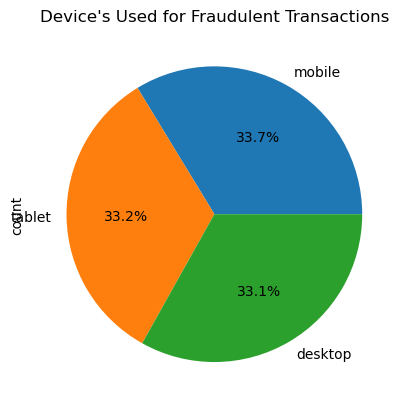

In [125]:
#behaviour of deviced used for fraudulent transactions
fig, ax = plt.subplots()
height= fraud_trans_amount["Device Used"].value_counts()
print(height)
height.plot.pie(autopct= "%1.1f%%")
#axis= np.arange(len(fraud_trans_amount))
ax.set_title("Device's Used for Fraudulent Transactions")
plt.show

Device Used
mobile     474328
tablet     473857
desktop    473341
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

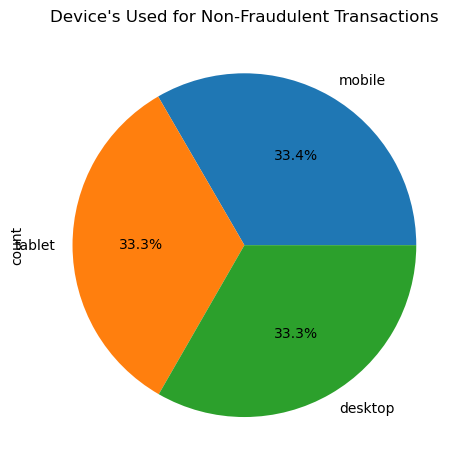

In [127]:
fig, ax = plt.subplots()
height2 = not_fraud["Device Used"].value_counts()
print(height2)
height2.plot.pie(autopct= "%1.1f%%")
#axis= np.arange(len(fraud_trans_amount))
ax.set_title("Device's Used for Non-Fraudulent Transactions")
plt.tight_layout()

plt.show

In [128]:
fig, ax = plt.figure(figsize= (8,6))
height2 = not_fraud["Device Used"].value_counts()
print(height2)
height2.plot.pie(autopct= "%1.1f%%")
#axis= np.arange(len(fraud_trans_amount))
ax.set_title("Device's Used for Non-Fraudulent Transactions")
plt.tight_layout()

plt.show

TypeError: cannot unpack non-iterable Figure object

<Figure size 800x600 with 0 Axes>

In [114]:
fraud_trans_amount["Customer Age"]

not_fraud["Customer Age"]


In [120]:
#t-test for customer age being the same between fraudulent and genuine transactions

import scipy.stats as stats 
stats.ttest_ind(not_fraud["Customer Age"],fraud_trans_amount["Customer Age"], equal_var= False)

TtestResult(statistic=1.2632685847994654, pvalue=0.20649621347946004, df=83167.87480067398)

In [121]:
#t-test for quantity being the same between fraudulent and genuine transactions
stats.ttest_ind(not_fraud["Quantity"], fraud_trans_amount["Quantity"], equal_var= False)

TtestResult(statistic=1.341229159468999, pvalue=0.17984972366826804, df=83183.52710845087)